In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

data = pd.read_csv('input/train.csv')
data = data.drop(['Healthcare_1', 'LifeSquare'], axis = 1)
data['DistrictId'] = data['DistrictId'].astype(str)
data = pd.get_dummies(data)

In [28]:
data.head()

,Id,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,2.0,47.981561,6.0,7,9.0,1969,0.089040,33,7976,...,0,0,0,0,0,1,0,1,0,1
1,15053,3.0,65.683640,8.0,7,9.0,1978,0.000070,46,10309,...,0,0,0,0,0,1,0,1,0,1
2,4765,2.0,44.947953,0.0,8,12.0,1968,0.049637,34,7759,...,0,0,0,0,0,1,0,1,0,1
3,5809,2.0,53.352981,9.0,8,17.0,1977,0.437885,23,5735,...,0,0,0,0,0,1,0,1,0,1
4,10783,1.0,39.649192,7.0,11,12.0,1976,0.012339,35,5776,...,0,0,0,1,0,1,0,1,0,1


In [29]:
data.shape

(10000, 225)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 225 entries, Id to Shops_2_B
dtypes: float64(6), int64(8), uint8(211)
memory usage: 3.1 MB


In [31]:
mmscaler = MinMaxScaler()
train_scaled = mmscaler.fit_transform(data)
train_scaled = pd.DataFrame(train_scaled)
train_scaled.head()

/home/ifl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.835695,0.105263,0.073203,0.002979,0.146341,0.076923,0.000003,0.170618,0.445946,0.412794,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.896119,0.157895,0.100866,0.003972,0.146341,0.076923,0.000003,0.000134,0.621622,0.536135,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.283665,0.105263,0.068463,0.000000,0.170732,0.102564,0.000003,0.095115,0.459459,0.401322,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.345815,0.105263,0.081597,0.004469,0.170732,0.145299,0.000003,0.839074,0.310811,0.294317,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.641922,0.052632,0.060182,0.003476,0.243902,0.102564,0.000003,0.023644,0.472973,0.296484,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [34]:
inertia_arr = []
for i in range(2, 50):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

14496.756960639335
13322.207508687081
12807.006236545249
12162.649582305157
11595.95412704669
11126.636804646072
10508.711829184143
10045.191297308938
9635.454778153626
9373.71327307431
9156.163890653028
8956.888076685354
8697.078323490192
8504.88436106254
8335.396837251894
8203.70494910083
8013.113633757608
7993.436578746817
7698.341939262534
7546.070536711946
7498.570291776794
7405.83735293206
7314.428110382584
7162.248145498047
7137.540793890832
6946.368602957265
6855.86843925326
6736.35477293814
6672.035585420824
6594.659353785343
6486.9783520034125
6433.4373224284045
6302.1931409279905
6223.754428339773
6165.275384558972
6078.961851491436
5969.9502591847695
5903.258651230666
5813.476592102017
5786.140641250016
5691.234650577018
5679.706763756481
5613.435688394126
5477.9099869268375
5438.422569711601
5367.451832192378
5306.922095744581
5258.477888180048


Text(0.5, 1.0, 'Inertia')

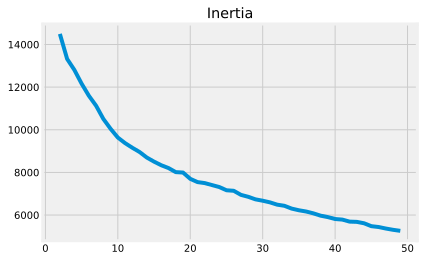

In [35]:
plt.plot([i for i in range(2, 50)], inertia_arr)
plt.title('Inertia')

In [35]:
train, valid = train_test_split(ls_ok, test_size=0.3, random_state=42)
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=100)
rfr.fit(train.drop(['LifeSquare'], axis=1), train['LifeSquare'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [44]:
pred_train = rfr.predict(train.drop(['LifeSquare'], axis=1))
pred_valid = rfr.predict(valid.drop(['LifeSquare'], axis=1))

In [45]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
r2(train['LifeSquare'], pred_train), mse(train['LifeSquare'], pred_train)

(0.8492987240239186, 1577.6423466038066)

In [47]:
r2(valid['LifeSquare'], pred_valid), mse(valid['LifeSquare'], pred_valid)

(-4.305071855025501, 1924.6908827027964)

In [48]:
pred_valid

array([21.66330299, 65.69692507, 21.76688595, ..., 24.17287288,
       47.29955871, 21.7818229 ])

In [12]:
data = data.drop(['LifeSquare', 'Healthcare_1'], axis = 1)
data = pd.get_dummies(data)
train, valid = train_test_split(data, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42, max_features=3)
rfr.fit(train.drop(['Price'], axis=1), train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [13]:
pred_train = rfr.predict(train.drop(['Price'], axis=1))
pred_valid = rfr.predict(valid.drop(['Price'], axis=1))

In [14]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
r2(train['Price'], pred_train), mse(train['Price'], pred_train)

(0.8800278239645121, 1035813932.6234682)

In [15]:
r2(valid['Price'], pred_valid), mse(valid['Price'], pred_valid)

(0.7169612862784742, 2434629671.077948)

In [16]:
rfr.feature_importances_

array([0.02373087, 0.05711513, 0.15806727, 0.27193162, 0.06269558,
       0.02969031, 0.03431065, 0.04848477, 0.03922218, 0.06632896,
       0.07163036, 0.06403865, 0.03036719, 0.03571006, 0.00046588,
       0.0004694 , 0.00138896, 0.00146402, 0.00142388, 0.00146426])

In [18]:
feat_imp = pd.DataFrame({'feature': data.columns.drop('Price'), 'importance':rfr.feature_importances_}).sort_values('importance')
feats = feat_imp.tail(10)['feature'].values
feats

array(['Shops_1', 'Ecology_1', 'HouseYear', 'DistrictId', 'KitchenSquare',
       'Social_3', 'Social_1', 'Social_2', 'Rooms', 'Square'],
      dtype=object)

In [28]:
?rfr

In [19]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=100, max_features=2)
rfr.fit(train[feats], train['Price'])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=100, verbose=0, warm_start=False)

In [20]:
pred_train = rfr.predict(train[feats])
pred_valid = rfr.predict(valid[feats])

In [21]:
r2(train['Price'], pred_train), mse(train['Price'], pred_train)

(0.9605947634041861, 340216327.09399676)

In [22]:
r2(valid['Price'], pred_valid), mse(valid['Price'], pred_valid)

(0.7256267915170943, 2360091118.0601344)

In [23]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'n_estimators': [900, 1000, 1100],
               'max_features': [1, 2, 3, 4], 
               'max_depth': [18, 19, 20]}]
GSCV = GridSearchCV(estimator=RandomForestRegressor(random_state=100), 
param_grid=parameters,
scoring='r2',
cv=3, verbose=1, n_jobs=3)
GSCV.fit(train[feats], train['Price'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.4min


In [28]:
GSCV.best_params_

{'max_depth': 18, 'max_features': 3, 'n_estimators': 1100}

In [42]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [22]:
GSCV.best_params_

{'max_depth': 19, 'max_features': 2, 'n_estimators': 1000}

In [29]:
y_pred_proba = GSCV.predict(train[feats])
r2(train['Price'], y_pred_proba)

0.9558702821124442

In [30]:
y_pred_proba = GSCV.predict(valid[feats])
r2(valid['Price'], y_pred_proba)

0.7278921628823121